In [1]:
import utils

model = utils.load_model("eryk-mazus/polka-1.1b")

In [2]:
# Few-shot prompt engineering examples
# The prompt contains a few examples of addition that GPT-2 can mimic.
prompt_template = """
You are a calculator. Solve the following:

5 + 3 = 8
12 + 7 = 19 
3 + 9 = 12
6 + 4 = 10
{} + {} =
""".strip()

def calculator(a, b):
    prompt = prompt_template.format(a, b)
    response = model(prompt, max_new_tokens=3, do_sample=1, temperature=0.2)
    answer = response.split()[0]
    return answer


In [3]:
from contextlib import suppress
from random import randint

def test(a, b):
	truth = a + b
	result = 0
	with suppress(ValueError):
		result = int(calculator(a, b))
	return (truth - result) / truth

def random_test(order):
	num_range = (2**order // 2, 2**order)
	a = randint(*num_range)
	b = randint(*num_range)
	return test(a, b)

In [23]:
calculator(10, 100)

'20'

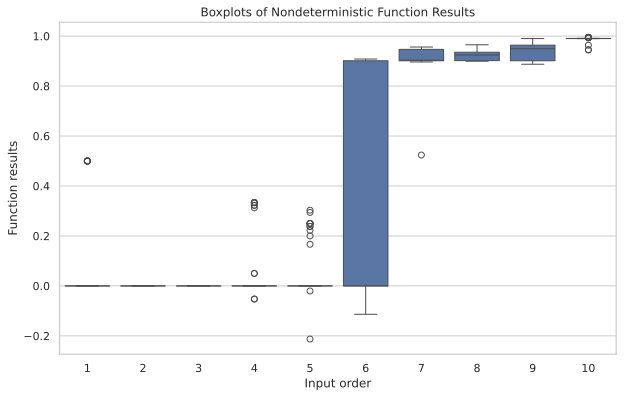

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

num_samples = 100
orders_of_magnitude = 10
df = pd.DataFrame(index=list(range(orders_of_magnitude * num_samples)), columns=('order', 'results') )

for i, (order, _) in enumerate(product(range(orders_of_magnitude), range(num_samples))):
    df.loc[i] = [order+1, random_test(order+1)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='order', y='results', data=df)
plt.title('Boxplots of Nondeterministic Function Results')
plt.xlabel('Input order')
plt.ylabel('Function results')
plt.xticks(ticks=range(len(df.order.unique())), labels=df.order.unique())
plt.show()
